# Лабораторная работа №2. Визуализация данных при помощи Python

## Подготовка

Прежде всего, необходимо импортировать библиотеки, которые будут использоваться для визуализации данных в этой лабораторной работе.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Из-за [бага](https://github.com/matplotlib/matplotlib/issues/26290) в библиотеке `matplotlib` могут выводиться не несущие смысла предупреждения. Чтобы не захламлять отчет, их стоит отключить.

In [29]:
import warnings
warnings.filterwarnings("ignore")

Установим темную тему:

In [30]:
sns.set(style="darkgrid")
plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

## Задание №1

### Датасет 1

Для анализа данных необходимо загрузить данные из файла в `dataframe` при помощи библиотеки `pandas`:

In [31]:
df = pd.read_csv("ships.csv", delimiter=",")

Этот датасет содержит некоторые спецификации и характеристики грузовых кораблей.

In [32]:
df.head(10)

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59
5,MAASTRICHT MAERSK,Container Ship,2019,214286,190326,399,59
6,ONE TREASURE,Container Ship,2018,210691,189766,400,58
7,ORE SHENZHEN,Bulk Carrier,2018,203953,398997,362,65
8,SAHAM MAX,Bulk Carrier,2013,201705,400694,360,65
9,BARZAN,Container Ship,2015,195636,199744,400,59


#### Пункт 1

__Задание:__ визуализировать 2-D график зависимости средней максимальной загрузки кораблей от длины корабля.

Для решения этого задания подойдет `seaborn.lineplot()`.

Согласно [документации](https://seaborn.pydata.org/generated/seaborn.lineplot.html), по умолчанию график агрегируется по нескольким значениям $y$ для каждого значения $x$ и отображает усредненное значение $y$. Это как раз то, что нужно.

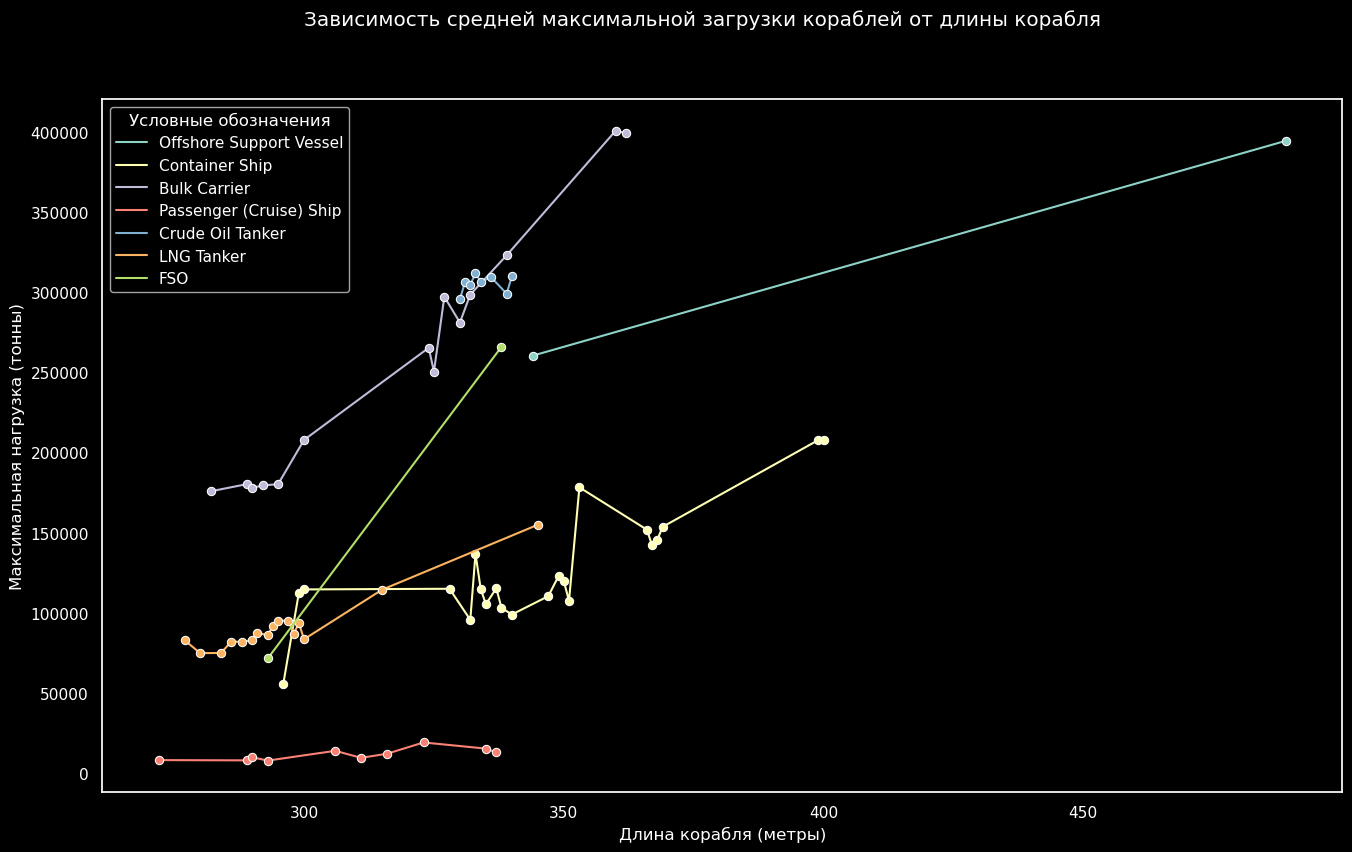

In [33]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Зависимость средней максимальной загрузки кораблей от длины корабля")

ax = sns.lineplot(data=df, x="length", y="dwt", marker="o", errorbar=None, hue="ship_name")

ax.set_xlabel("Длина корабля (метры)")
ax.set_ylabel("Максимальная нагрузка (тонны)")

ax.legend(loc=2, title="Условные обозначения")

plt.grid()
plt.show()

#### Пункт 2

__Задание:__ визуализировать распределение количества кораблей по их типу.

Для визуализации распределения в `seaborn` есть функция `seaborn.distplot()`. На данный момент она [устарела](https://seaborn.pydata.org/generated/seaborn.distplot.html), и будет в скором времени удалена. Авторы библиотеки [рекомендуют](https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751) воспользоваться `seaborn.histplot()`.

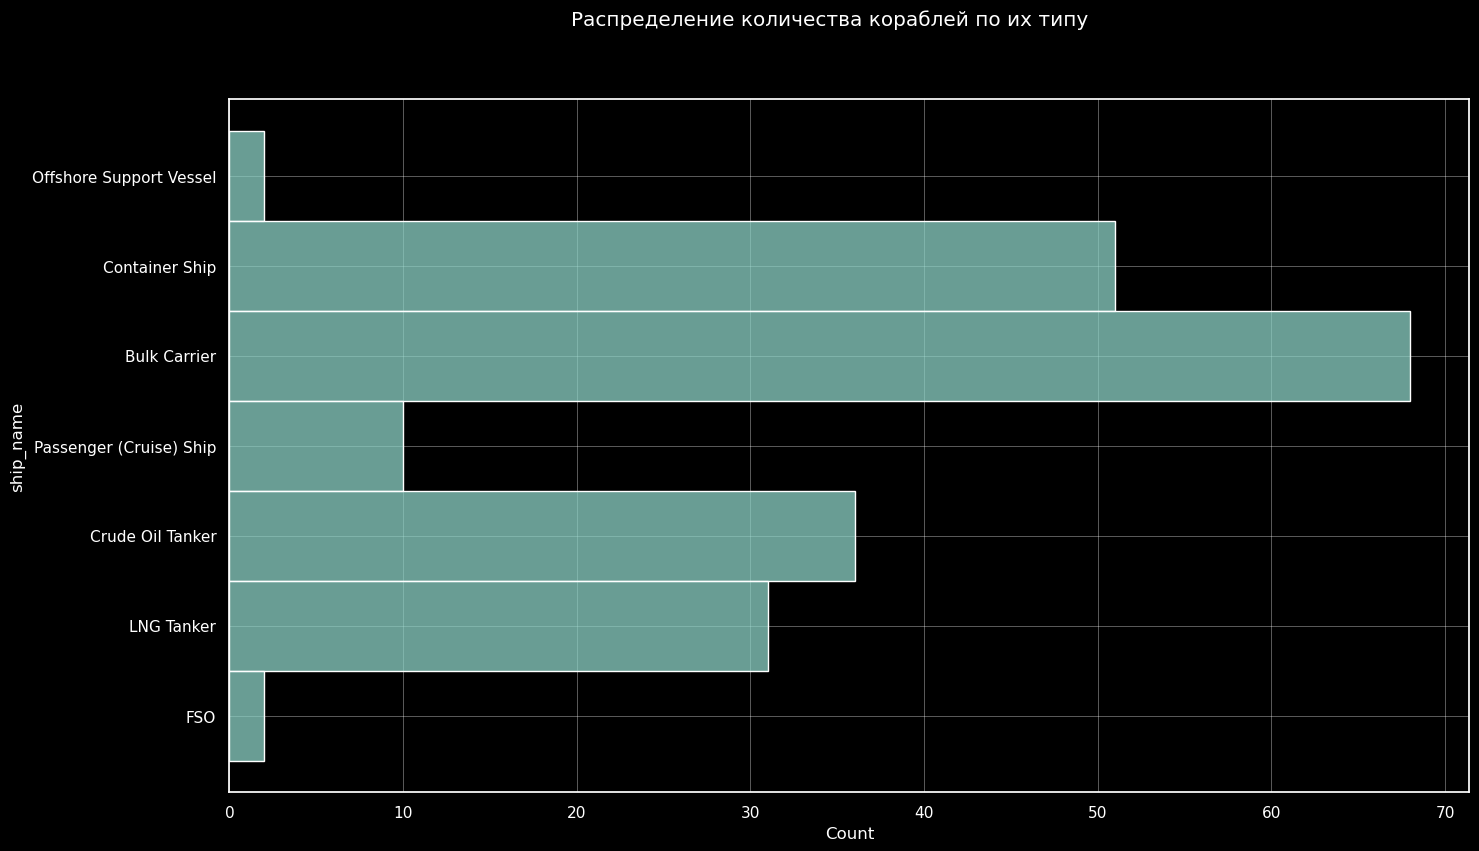

In [34]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Распределение количества кораблей по их типу")

ax = sns.histplot(data=df, y="ship_name")

In [35]:
for i in ax.containers:
    ax.bar_label(i, padding=10)

In [36]:
    
ax.set(ylabel=None)
ax.set(xlabel="Количество")
ax.xaxis.set_visible(False)

ax.legend(loc=1, labels=["Количество кораблей"], title="Условные обозначения")

sns.despine(top=True, bottom=True, left=False, right=True)
plt.show()

<Figure size 640x480 with 0 Axes>

Для повышения читаемости графика были удалены границы графика и ось $y$, показывающая количество. Вместо этого к каждому столбцу добавлена надпись, показывающая точное значение.

#### Пункт 3

__Задание:__ визуализировать гистограмму распределения количества кораблей по годам постройки.

В этом задании для визуализации используется `seaborn.histplot()`. Количество интервалов было выбрано так, чтобы избавиться от столбцов, мешающих обнаружить тенденцию

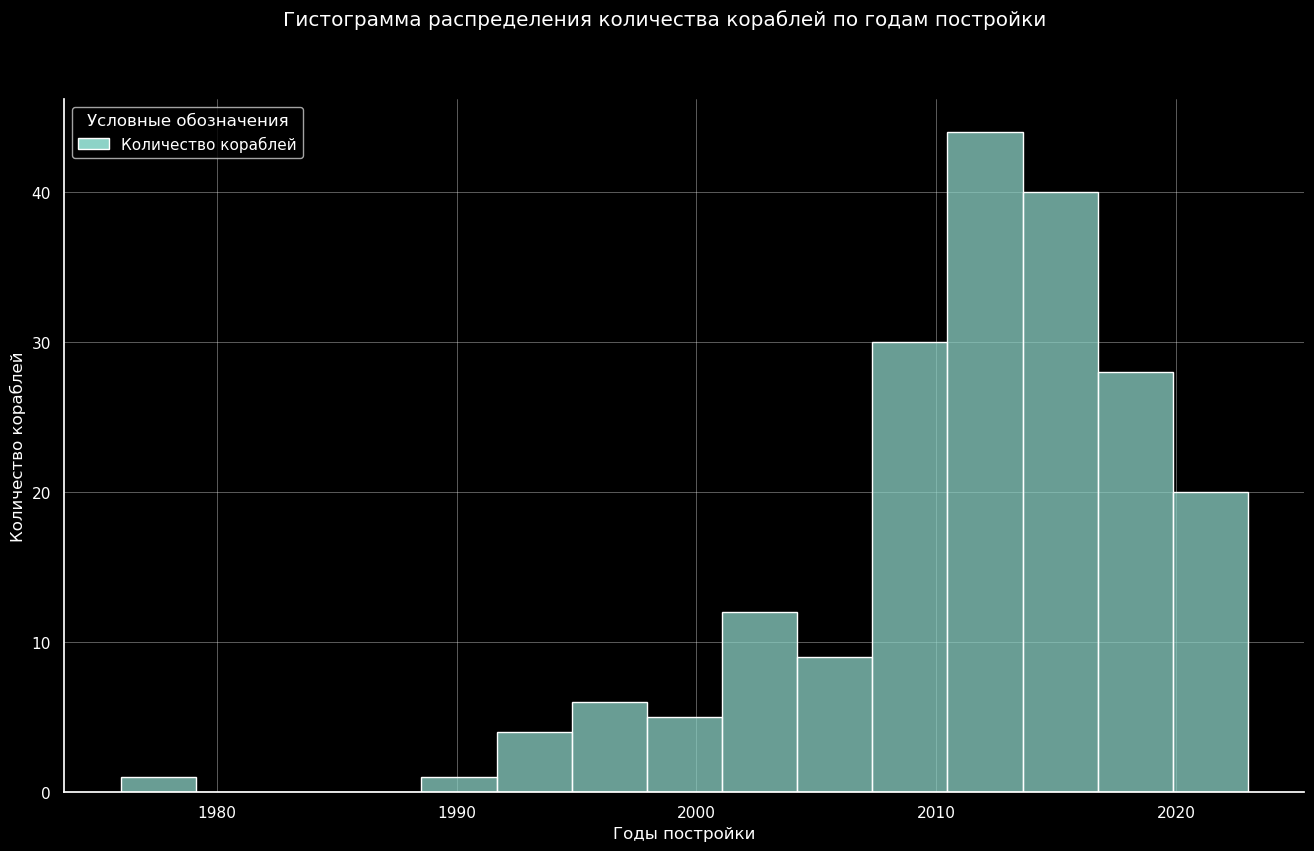

In [37]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Гистограмма распределения количества кораблей по годам постройки")

ax = sns.histplot(data=df, x="built_year", bins=15)

ax.set(xlabel="Годы постройки")
ax.set(ylabel="Количество кораблей")

ax.legend(loc=2, labels=["Количество кораблей"], title="Условные обозначения")

sns.despine(top=True, bottom=False, left=False, right=True)
plt.show()

#### Пункт 4

__Задание:__ визуализировать 2-D гистограмму распределения количества кораблей по годам постройки и максимальному весу груза. Для максимального веса груза сформировать 20 диапазонов, от минимального до максимального значений с равным шагом.

In [38]:
df["dwtgroup"] = pd.qcut(df['dwt'], 20)
grouped = df.groupby(by=["built_year", "dwtgroup"]).size().reset_index(name="count")

pivot = pd.pivot(
    grouped,
    columns="built_year",
    index="dwtgroup",
    values="count",
)

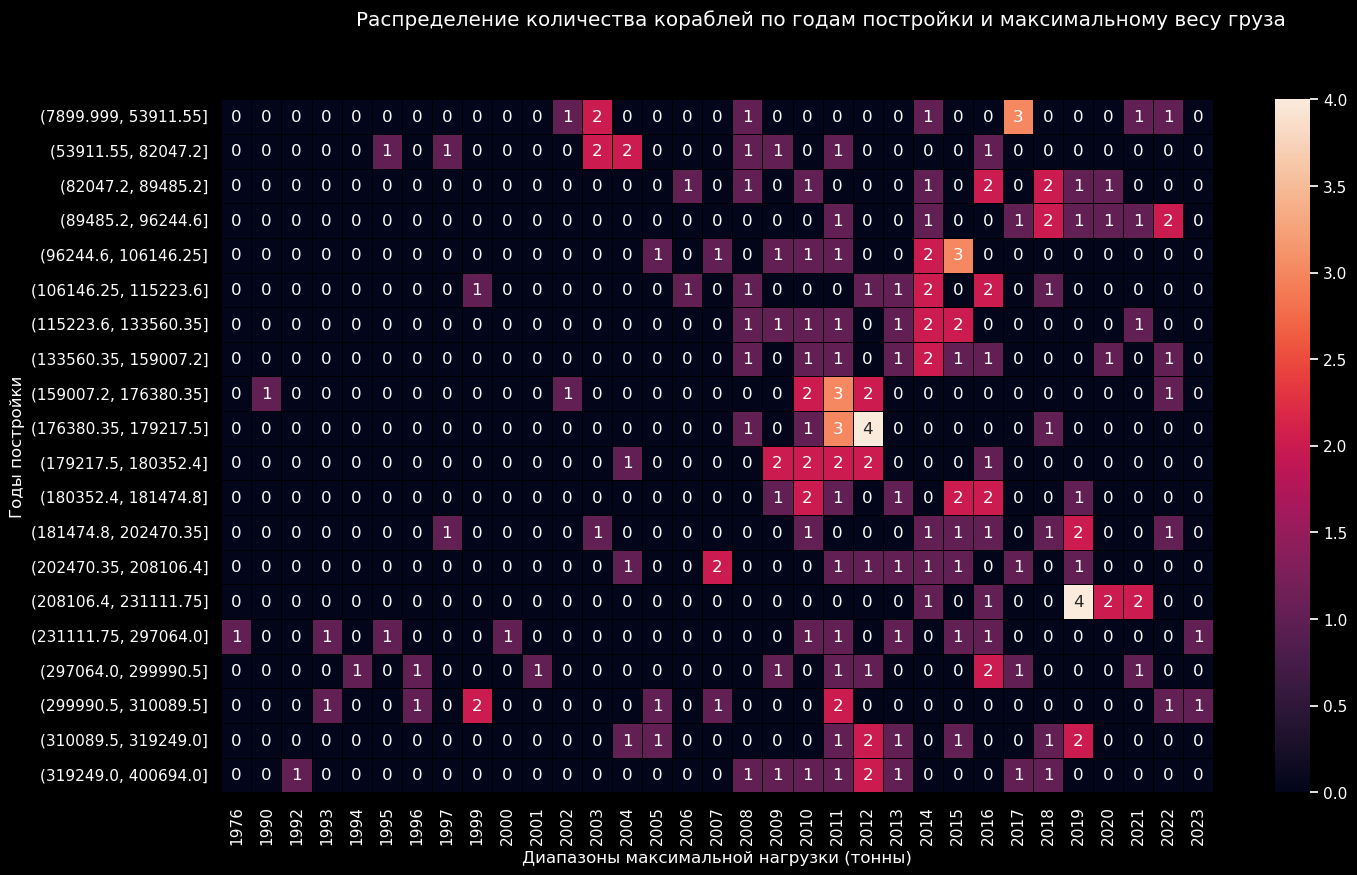

In [39]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Распределение количества кораблей по годам постройки и максимальному весу груза")

ax = sns.heatmap(pivot, annot=True, linewidths=.5, linecolor='black')

ax.set(xlabel="Диапазоны максимальной нагрузки (тонны)")
ax.set(ylabel="Годы постройки")

plt.show()

### Датасет 2

Загрузка нового датасета:

In [40]:
df = pd.read_csv("iris.csv", delimiter=",")

В датасете содержатся данные о параметрах цветков ириса трех видов.

In [41]:
df.groupby("species").head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


#### Пункт 1

__Задание:__ визуализировать парную диаграмму для датасета.

Для визуализации была использована функция `seaborn.pairplot()`. Изначально график содержал точки одинакового цвета и не сообщал никакой полезной информации. Разделение ирисов по цветам решило проблему.

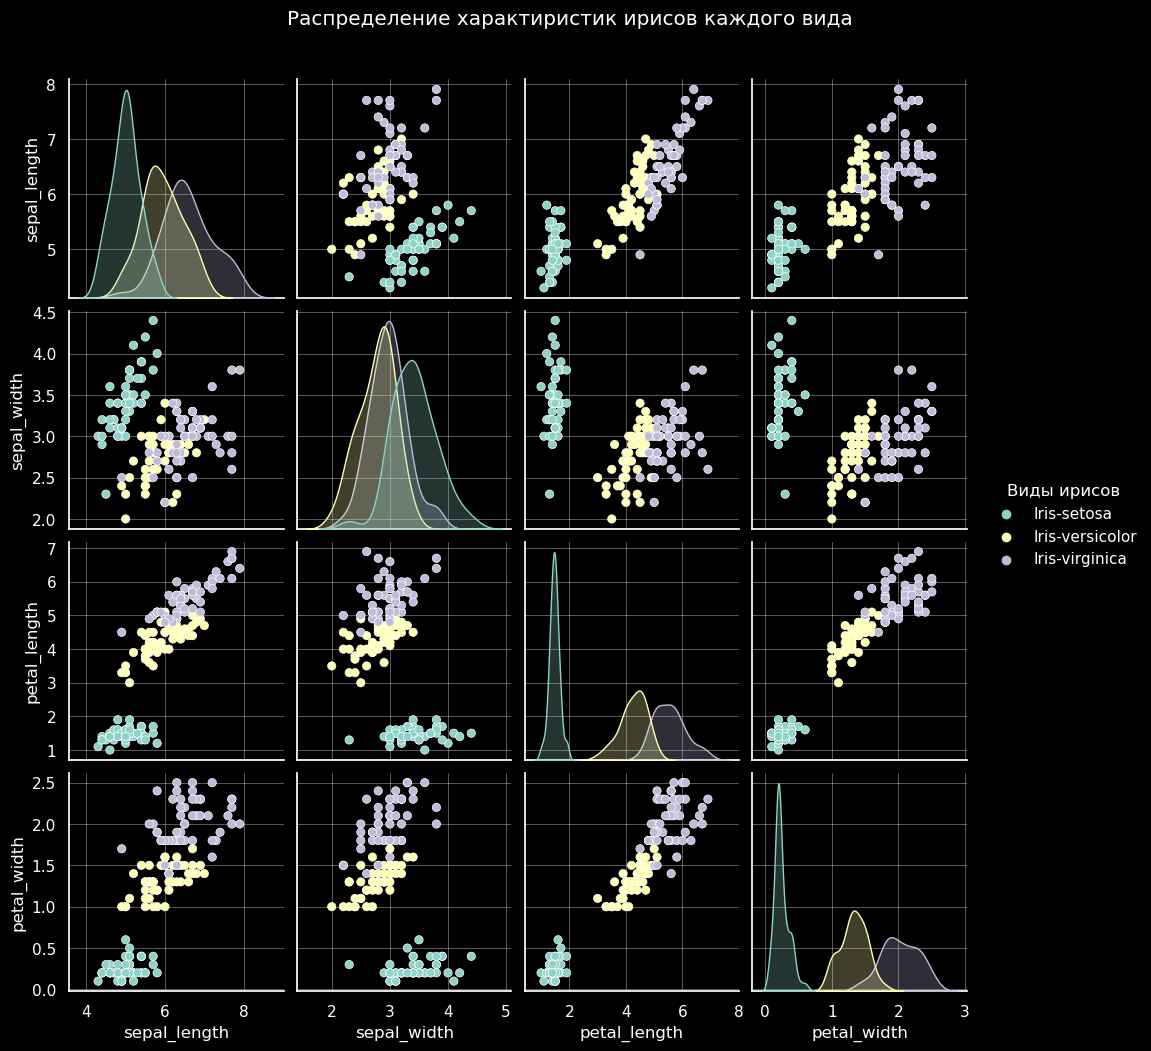

In [42]:
ax = sns.pairplot(data=df, hue="species")
ax.fig.suptitle("Распределение характиристик ирисов каждого вида", y=1.05)

ax._legend.set_title("Виды ирисов")

plt.show()

#### Пункт 2

__Задание:__ визуализировать скрипичную диаграмму с распределением всех четырех характеристик ирисов каждого вида (для каждой характеристики отдельные "скрипки" для разных видов ириса).

Чтобы правильно разместить графики, холст был разбит на 4 равные части, по одной на характеристику.

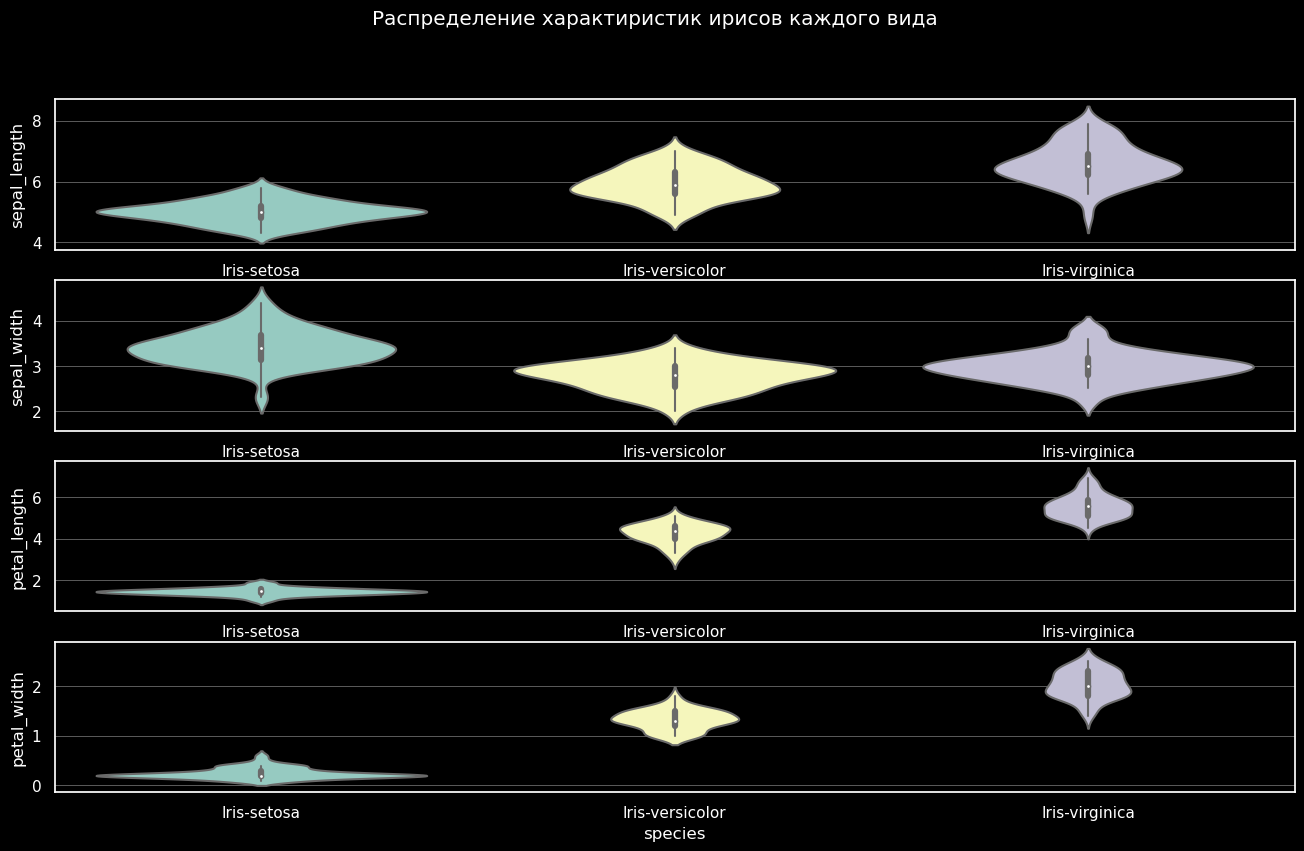

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(16, 9))
fig.suptitle("Распределение характиристик ирисов каждого вида")

sns.violinplot(ax=ax[0], data=df, x="species", y="sepal_length")
sns.violinplot(ax=ax[1], data=df, x="species", y="sepal_width")
sns.violinplot(ax=ax[2], data=df, x="species", y="petal_length")
sns.violinplot(ax=ax[3], data=df, x="species", y="petal_width")

plt.show()

## Задание №2

### Датасет 1

Загрузка нового датасета:

In [44]:
df = pd.read_csv("salaries.csv", delimiter=",")

Поскольку это первое задание, связанное с аналитикой данных при помощи профессионального инструмента, мне показалось интересным рассмотреть перспективу выбора профессии аналитика данных. В датасете содержится информация о вакансиях, связанных с data science: должность, квалификация, расположение, зарплата и др.

In [45]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
5,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L
6,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M
7,2023,EN,FT,Machine Learning Engineer,145885,USD,145885,US,M
8,2023,EN,FT,Research Scientist,220000,USD,220000,US,L
9,2023,EN,FT,Data Engineer,85000,USD,85000,US,M


В [обсуждениях](https://www.kaggle.com/datasets/harishkumardatalab/data-science-salary-2021-to-2023/discussion/433325) датасета была поднята тема повторения строк. Действительно, при проверке оказалось, что значительная часть строк дублируется:

In [46]:
size = len(df)
d_count = df.duplicated().sum()

print(f"Всего записей: {size}")
print(f"Дубликаты: { d_count }")
print(f"Процент дубликатов: { round(d_count / size * 100, 2) }%")

Всего записей: 3761
Дубликаты: 1351
Процент дубликатов: 35.92%


Процент дубликатов очень большой - более трети датасета - но и оставшихся данных хватит для анализа.

Избавимся от дубликатов:

In [47]:
df=df.drop_duplicates()
d_count = df.duplicated().sum()

print(f"Дубликаты: { d_count }")

Дубликаты: 0


#### Пункт 1

Прежде всего, мне захотелось узнать, на какую зарплату можно расчитывать, если добиться высот в области data science.

Для ответа на вопрос я сгруппировал данные по должности и нашел среднюю зарплату для каждой. Получившийся набор даных отсортировал по убыванию.

In [48]:
average_salary = df.groupby("job_title")["salary_in_usd"].mean().reset_index()
average_salary = average_salary.sort_values(by='salary_in_usd', ascending=False)

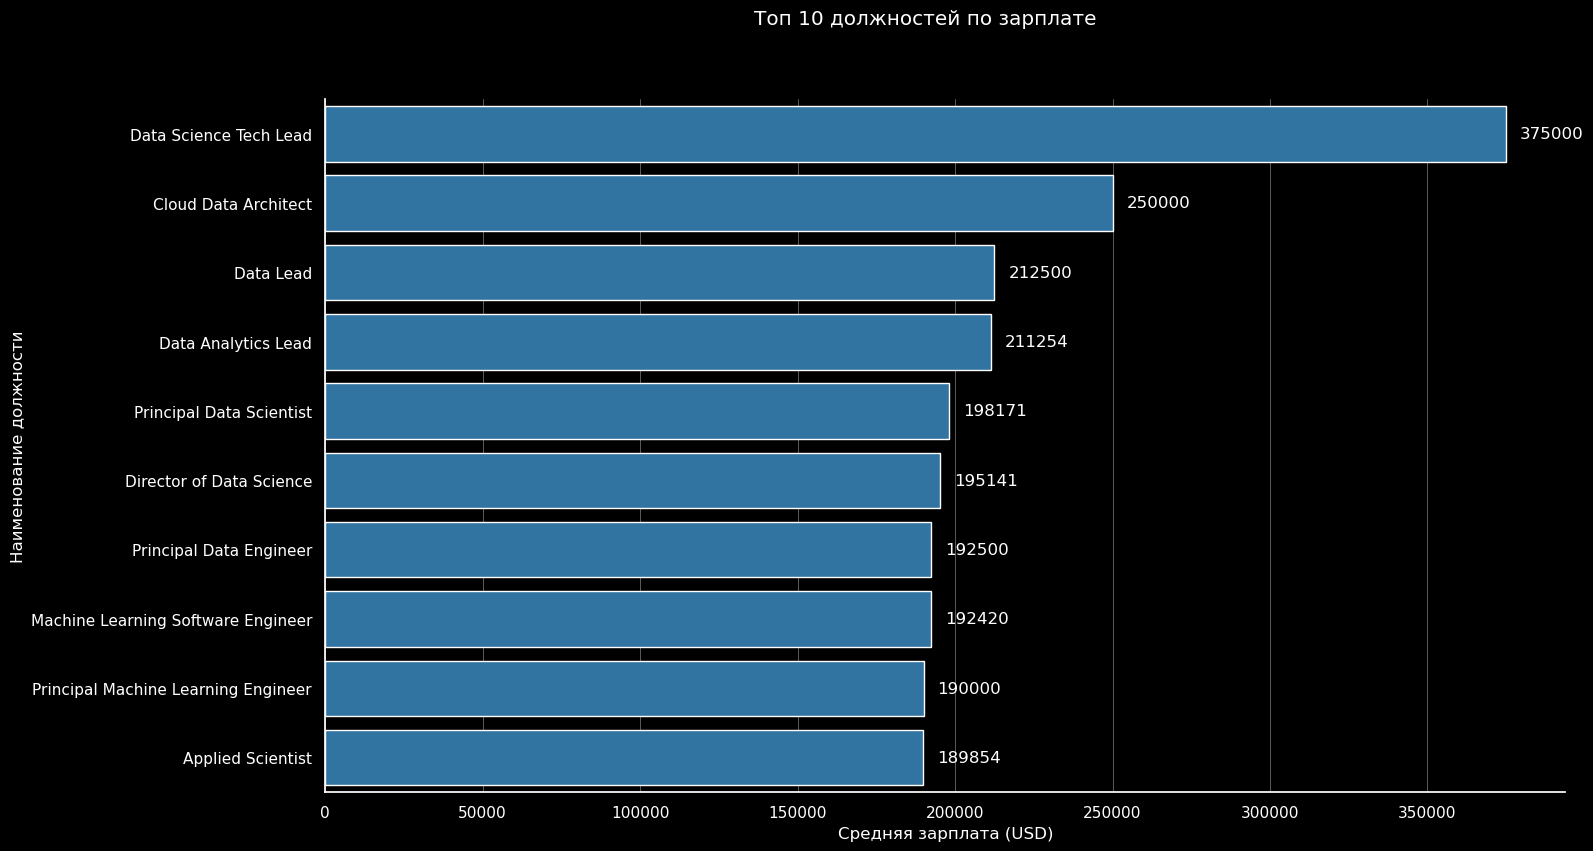

In [49]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Топ 10 должностей по зарплате")

ax = sns.barplot(data=average_salary.head(10), y="job_title", x="salary_in_usd", errorbar=None, color="tab:blue")
for i in ax.containers:
    ax.bar_label(i, padding=10)

ax.set(xlabel="Средняя зарплата (USD)")
ax.set(ylabel="Наименование должности")

sns.despine(top=True, bottom=False, left=False, right=True)
plt.show()

Этот график показывает, что у начинающего аналитика есть огромный потенциал для развития. Среди прочих должностей особенно выделяется Data Science Tech Lead со средней зарплатой в $375000$, что в $1.5$ раз больше, чем у должности на втором месте.

#### Пункт 2

Из предыдущего графика следует, что аналитику всегда есть куда расти. Но на какого рода компании ему следует обращать внимание при трудоустройстве, если он хочет наибольший доход?

Следующий график должен ответить на вопрос. Он показывает среднюю зарплату в зависимости от квалификации специалиста и размера компании.

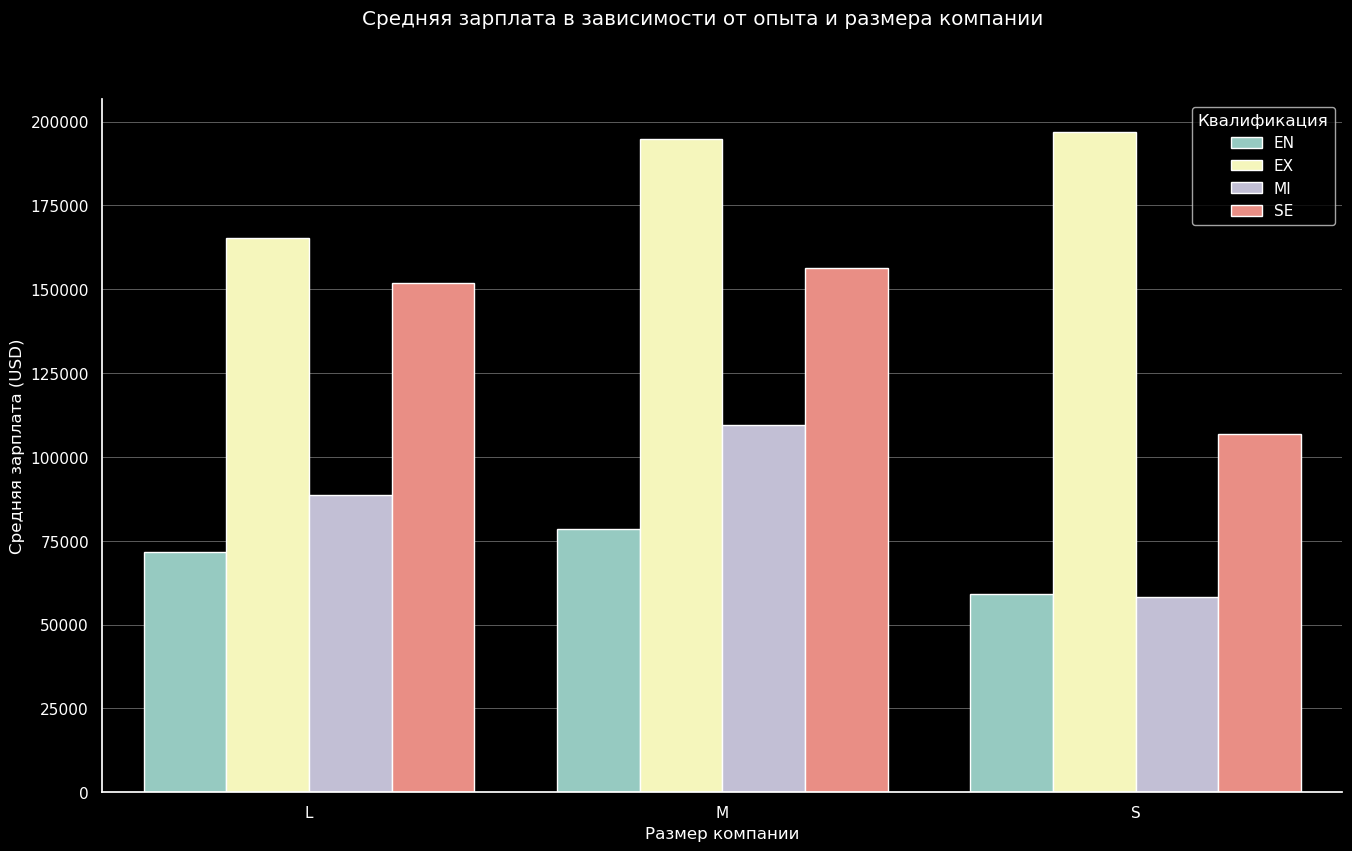

In [50]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Средняя зарплата в зависимости от опыта и размера компании")

ax = sns.barplot(data=df, x="company_size", y="salary_in_usd", hue="experience_level", errorbar=None)

ax.set(xlabel="Размер компании")
ax.set(ylabel="Средняя зарплата (USD)")

ax.get_legend().set_title("Квалификация")

sns.despine(top=True, bottom=False, left=False, right=True)
plt.show()

__Из графика следует, что:__
1. Компании среднего размера платят больше специалистам практически каждой квалификации.
2. Начинающему специалисту, возможно, не стоит обращать внимание на маленькие компании, поскольку в них первые два уровня квалификации оплачиваются одинаково

Конечно, на выбор места работы влияет не только финансовый фактор, но он является немаловажным.

#### Пункт 3

In [51]:
average_salary = df.groupby("employment_type")["salary_in_usd"].mean().reset_index()

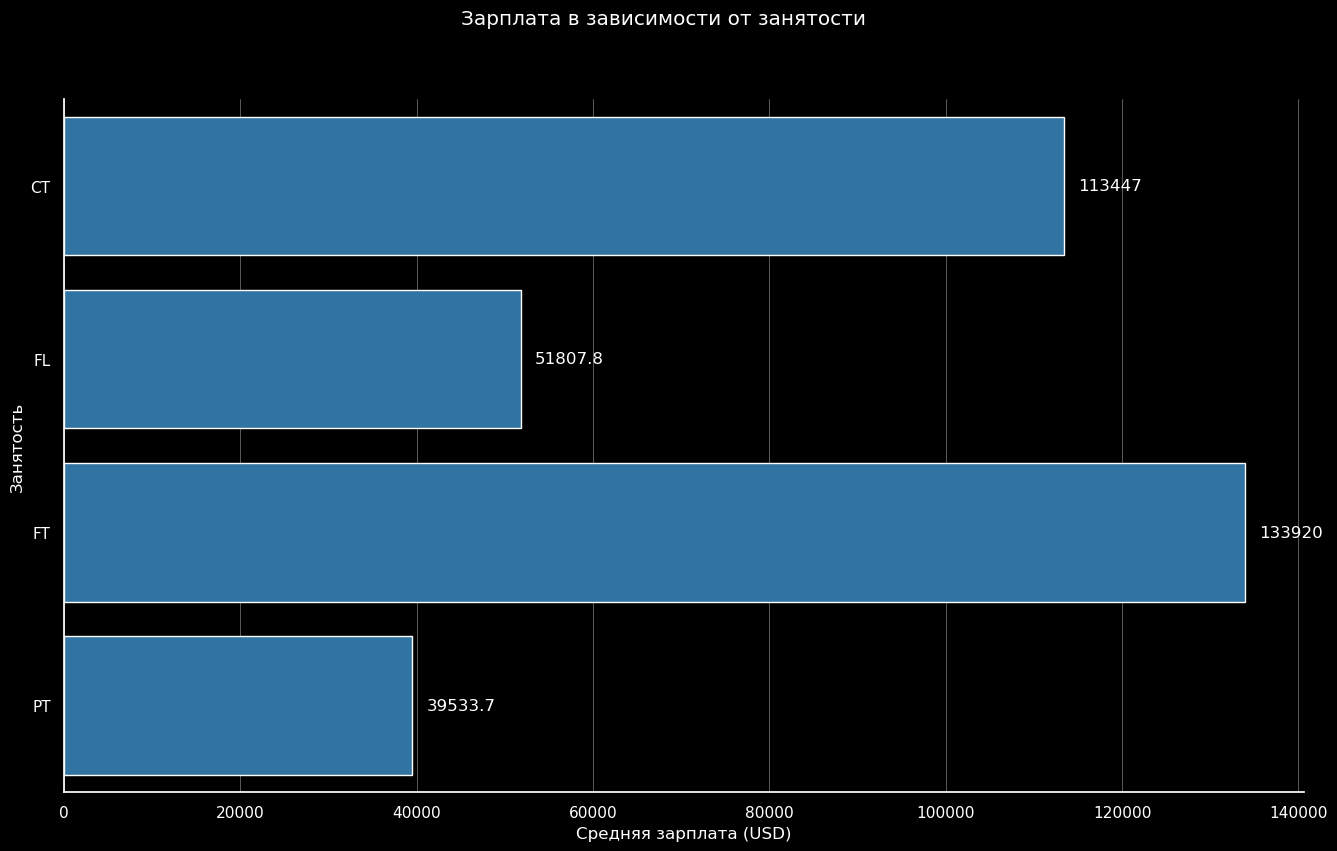

In [52]:
fig = plt.figure(figsize=(16, 9))
fig.suptitle("Зарплата в зависимости от занятости")

ax = sns.barplot(data=average_salary, y="employment_type", x="salary_in_usd", errorbar=None, color="tab:blue")
for i in ax.containers:
    ax.bar_label(i, padding=10)

ax.set(xlabel="Средняя зарплата (USD)")
ax.set(ylabel="Занятость")

sns.despine(top=True, bottom=False, left=False, right=True)
plt.show()

__Из графика следует, что:__
1. Наибольшую зарплату получают специалисты с полным рабочим днем (FT) - 133920\$
2. На втором месте находятся работники по контракту (CT) - 113447\$